In [1]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#normalizes data between -1 and 1
#returns normalized data and the factors used to normalzie 
def normalize(x):
    maxes = x.max(0, keepdim=True)[0]
    x_normed = x / x.max(0, keepdim=True)[0]
    return (x_normed, maxes)


In [3]:
#Convert data to tensor, trim, and normalize 
data= np.load('Phase02.npy', mmap_mode=None, allow_pickle=True, fix_imports=True,encoding='ASCII')
data = data[:,[0,2,3,4,5,6,7,8,9]] #edits out blank column 
data = torch.from_numpy(data)
data, normalization_factor = normalize(data)

#Break into training and validation and split inputs from outputs
valData, trainData  = train_test_split(data, train_size=.2, random_state=3)
trainInput = trainData[ :,0:7]
trainOutput = trainData[ :,7:9]
valInput = valData[ :,0:7]
valOutput = valData[ :,7:9]





In [4]:
#output the shape of given data set
#used to ensure proper triming and sectioning
data.shape


torch.Size([2187, 9])

In [5]:
#Build each layer of nueral network
#Provide forward method to train network
class ModeI(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        #Initialzing layers
        super(ModeI, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)
        self.act_output = nn.Sigmoid()
    #training function
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.act_output(out)
        return out
    
#Instantiate class with input, hidden layer, and output size 
model = ModeI(7,64,64,2)
#Change to double data type
model.double()



ModeI(
  (fc1): Linear(in_features=7, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=2, bias=True)
  (act_output): Sigmoid()
)

In [6]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [7]:
# compute accuracy (no_grad is optional)
def deviation():
    with torch.no_grad():
        y_pred = model(valInput)

    accuracy = (abs(y_pred-valOutput)).float().mean()
    return (f"Deviation: {100*accuracy}%")


In [8]:
#training loop 
def train(epoch_number, batch_size):
    for epoch in range(epoch_number):
        for i in range(0, len(trainInput), batch_size):
            Xbatch = trainInput[i:i+batch_size]
            y_pred = model(Xbatch)
            ybatch = trainOutput[i:i+batch_size]
            loss = loss_fn(y_pred, ybatch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f"Finished epoch {epoch}, {deviation()}")


In [9]:
train(30,5)
train(30,7)
train(30,3)
train(30,5)

C:\Users\USU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\autograd\__init__.py:200: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 7050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ..\c10\cuda\CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Finished epoch 0, Deviation: 13.562482833862305%
Finished epoch 1, Deviation: 12.024223327636719%
Finished epoch 2, Deviation: 11.27667236328125%
Finished epoch 3, Deviation: 10.774805068969727%
Finished epoch 4, Deviation: 10.429691314697266%
Finished epoch 5, Deviation: 10.130255699157715%
Finished epoch 6, Deviation: 9.754111289978027%
Finished epoch 7, Deviation: 9.427053451538086%
Finished epoch 8, Deviation: 8.970239639282227%
Finished epoch 9, Deviation: 8.575637817382812%
Finished epoch 10, Deviation: 7.979447364807129%
Finished epoch 11, Deviation: 7.379735946655273%
Finished epoch 12, Deviation: 6.738469123840332%
Finished epoch 13, Deviation: 6.323631286621094%
Finished epoch 14, Deviation: 5.982227802276611%
Finished epoch 15, Deviation: 5.266170978546143%
Finished epoch 16, Deviation: 4.806314468383789%
Finished epoch 17, Deviation: 4.43048095703125%
Finished epoch 18, Deviation: 3.973677635192871%
Finished epoch 19, Deviation: 3.50191068649292%
Finished epoch 20, Deviatio

In [10]:
# find k value for given input adjusting for normalization

def kequals(inputs):
    answer = model(torch.DoubleTensor(inputs)/normalization_factor[:,0:7])
    return (answer*normalization_factor[:,7:9]).tolist()[0]

In [11]:
load = 100000000
distance = .06
a1 = 0.02
a2 = 0.02
theta1 = .314
theta2 = .314
thickness = 0.01

x = []
k1 = []
k2 =[]
for i in range(100):
    varies = .01 + i*.01/100
    x.append(varies)
    answer = kequals([load, distance, a1,a2,theta1,theta2,varies])
    k1.append(answer[0])
    k2.append(answer[1])





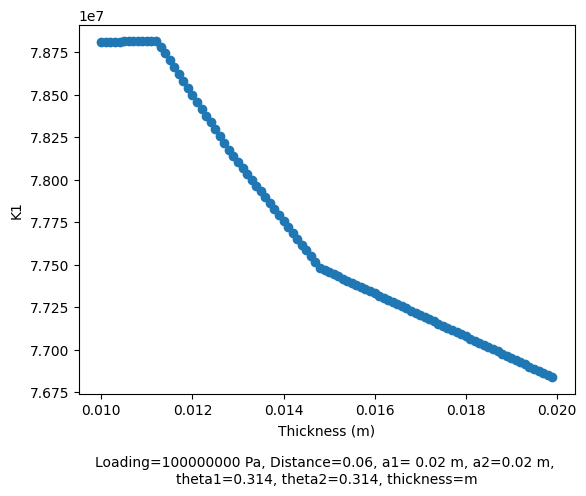

In [12]:
#Output scatter plot for K1
plt.scatter(x,k1)
plt.xlabel(f"Thickness (m)\n\nLoading={load} Pa, Distance={distance}, a1= {a1} m, a2={a2} m, \ntheta1={theta1}, theta2={theta2}, thickness=m")
plt.ylabel("K1")
plt.show()

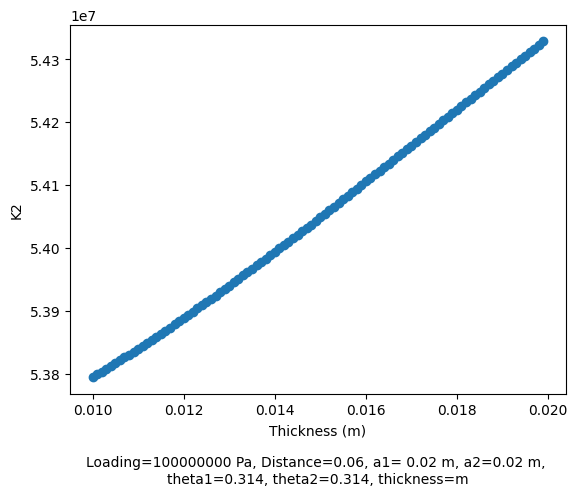

In [13]:
#Output scatter plot for K2
plt.scatter(x,k2)
plt.xlabel(f"Thickness (m)\n\nLoading={load} Pa, Distance={distance}, a1= {a1} m, a2={a2} m, \ntheta1={theta1}, theta2={theta2}, thickness=m")
plt.ylabel("K2")
plt.show()